In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_log_error,mean_squared_error,r2_score

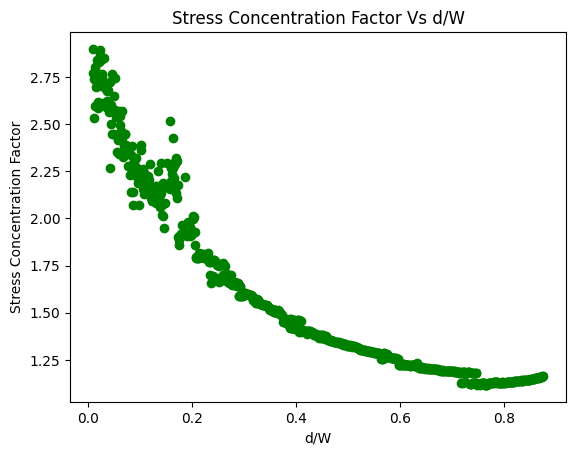

In [2]:
data=pd.read_excel(r"data_excel.xlsx")
y=data['Stress Concentration Factor']

#print(data.head(5))
x=data[["d/W"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42,shuffle=True)
# x_train=x
# x_test=x
# y_train=y
# y_test=y
plt.scatter(x_train,y_train,color='green')
plt.title("Stress Concentration Factor Vs d/W")
plt.xlabel("d/W")
plt.ylabel("Stress Concentration Factor")
plt.show()

In [3]:
standard_scaler=StandardScaler()
x_train_scaled=standard_scaler.fit_transform(x_train)
x_test_scaled=standard_scaler.transform(x_test)

In [4]:

from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2, include_bias=False)
x_train_poly=poly.fit_transform(x_train_scaled)
x_test_poly=poly.transform(x_test_scaled)
model=LinearRegression()
model.fit(x_train_poly,y_train)


LinearRegression()

In [5]:

from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2, include_bias=False)
x_train_poly=poly.fit_transform(x_train_scaled)
x_test_poly=poly.transform(x_test_scaled)
model=LinearRegression()
model.fit(x_train_poly,y_train)


LinearRegression()

In [6]:

# On training data
y_train_pred=model.predict(x_train_poly)
print("Training data")
print("Mean Absolute Error:",mean_absolute_error(y_train,y_train_pred))
print("Mean Squared Error:",mean_squared_error(y_train,y_train_pred))
print("Root Mean Squared Error:",math.sqrt(mean_squared_error(y_train,y_train_pred)))
print("R2 Score:",r2_score(y_train,y_train_pred))
print ("ACCURACY OF MODEL IS:",r2_score(y_train,y_train_pred)*100)

Training data
Mean Absolute Error: 0.056394100951824885
Mean Squared Error: 0.005596098289003984
Root Mean Squared Error: 0.07480707378987621
R2 Score: 0.9724630711159834
ACCURACY OF MODEL IS: 97.24630711159834


In [7]:
# On test Data
print("\n\n\nOn test Data")
y_pred=model.predict(x_test_poly)
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Log Error:",mean_squared_log_error(y_test,y_pred))
print("Root Mean Squared Error:",math.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score:",r2_score(y_test,y_pred))




On test Data
Mean Absolute Error: 0.05590169840330592
Mean Squared Log Error: 0.000630751341874877
Root Mean Squared Error: 0.07071005261717254
r2_score: 0.970588397756397


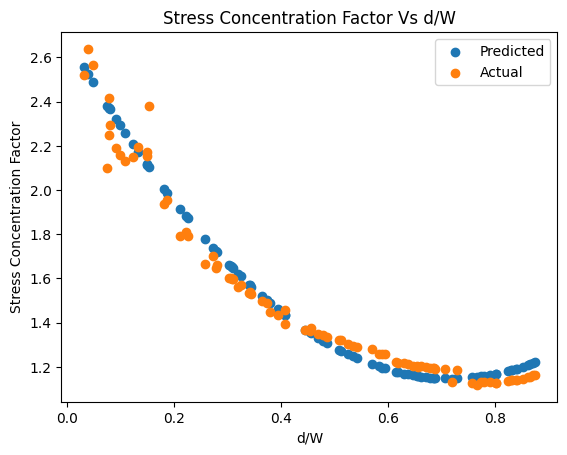

In [8]:
plt.scatter(y=y_pred,x=x_test)
plt.scatter(y=y_test,x=x_test)
plt.legend(["Predicted","Actual"])
plt.title("Stress Concentration Factor Vs d/W")
plt.xlabel("d/W")
plt.ylabel("Stress Concentration Factor")
plt.show()


In [10]:


val=float(input("Enter the value:"))
val_scaled=standard_scaler.transform([[val]])
print("For diameter/width (d/w)",val ,"Stress concentration factor is :")
print(model.predict(poly.transform(np.reshape([val_scaled],(1,-1)))))

For diameter/width (d/w) 0.41 Stress concentration factor is :
[1.42935636]


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
